## Multiple Linear Regression

In [1]:
#Importing needed packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Dataset source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
# FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
# I donwloaded and saved data in my local computer
# Download the dataset from this link: https://drive.google.com/file/d/1-g_08xw_bSzlI9kl-vPjlLx0YR2-ApiA/view?usp=sharing
#  import and read data
import sys
#sys.path[0] # current directory
filepath = sys.path[0] + '/FuelConsumptionCo2.csv'
df=pd.read_csv(filepath)
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Extracting dataset use for linear regression model
df_extract = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_extract.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


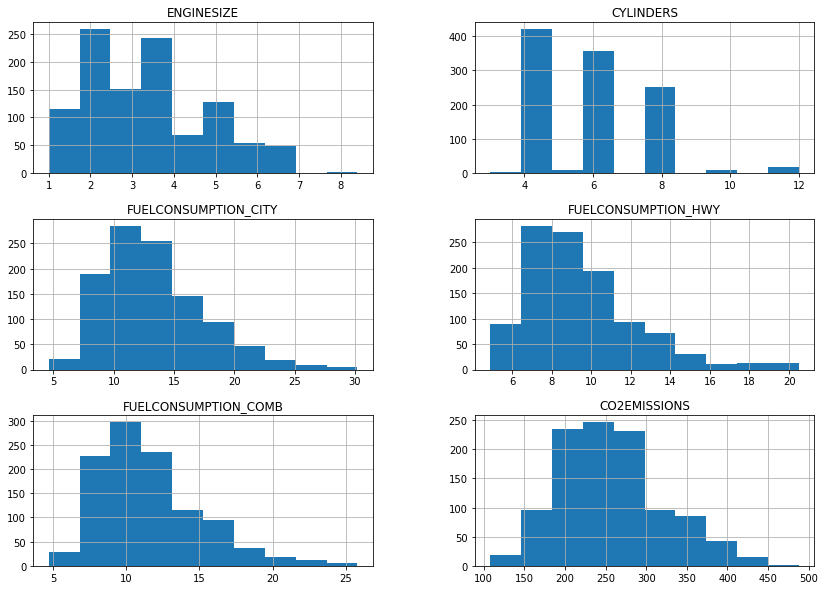

In [5]:
df_extract.hist(figsize=(14,10))
plt.show()

In [19]:
#Creating train and test dataset: approach - Train/Test Split
#Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_extract, test_size=0.2, random_state=0)
train.shape, test.shape

((853, 6), (214, 6))

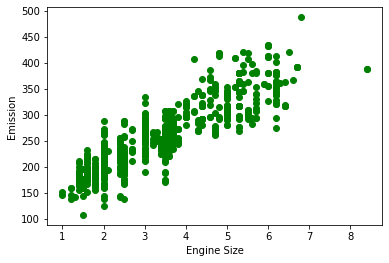

In [20]:
#Train data distribution
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'], color='green')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [21]:
# Multiple Regression Model
# For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars.
from sklearn import linear_model
lm = linear_model.LinearRegression()
#set of predictors

#using dataframe as input for fit() method of sklearn
#x_train = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
#y_train = train[['CO2EMISSIONS']]

# However, for consistency, I will convert dataframe into numpy array for fit(). In this example, both dataframe and numpy array work and give the same results
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
lm.fit(x_train,y_train)
lm.coef_ # print out the set of theta
#lm.intercept_ #print out the intercept
#Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

array([[11.98993058,  7.54469599,  8.98695981]])

## Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [22]:
# Prediction
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y_hat= lm.predict(x_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(x_test, y_test))
# explained variance regression score:
#If  𝑦̂   is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:
# 𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟𝑦−𝑦̂ 𝑉𝑎𝑟𝑦 
#The best possible score is 1.0, lower values are worse.

Residual sum of squares: 589.24
Variance score: 0.86


In [23]:
# Example: predicting co2emission using FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY and Cylinders of cars.
# using the same train dataset
lm_fuel = linear_model.LinearRegression()
#set of predictor
x_train_fuel = np.asanyarray(train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CYLINDERS']])
# target
y_train_fuel = np.asanyarray(train[['CO2EMISSIONS']])
#fit the model
lm_fuel.fit(x_train_fuel,y_train_fuel)
#print out coef
lm.coef_

array([[11.98993058,  7.54469599,  8.98695981]])

In [24]:
# Prediction with test set of data
x_test_fuel = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CYLINDERS']])
y_test_fuel = np.asanyarray(test[['CO2EMISSIONS']])
# obtain a prediction
y_hat_fuel = lm.predict(x_test_fuel)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat_fuel - y_test_fuel) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm_fuel.score(x_test_fuel, y_test_fuel))

Residual sum of squares: 10178.54
Variance score: 0.86
